<a href="https://colab.research.google.com/github/vstrah00/CUDA-transformations--GPU-vs-CPU-/blob/main/cpu_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For both CPU and GPU notebooks
!pip install opencv-python
!pip install opencv-python-headless

In [8]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

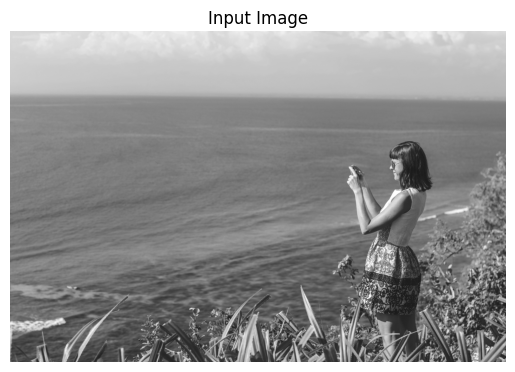

In [15]:
# Function to load and preprocess the image
def load_image(filename):
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Error: Could not load image.")
    return image

# Load the image
filename = 'taking-pic.jpg'  # Update with your image path
image = load_image(filename)

# Display the input image
plt.imshow(image, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

In [11]:
def sobel_filter_cpu(image):
    height, width = image.shape
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

    grad_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)

    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    output_image = np.uint8(np.clip(magnitude, 0, 255))

    return output_image

CPU Time: 0.390638 seconds


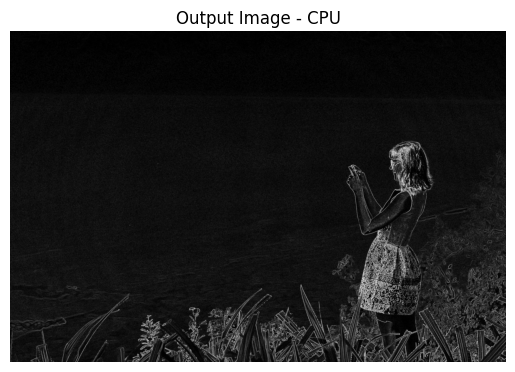

In [19]:
# Measure CPU performance
start_time = time.time()
output_cpu = sobel_filter_cpu(image)
end_time = time.time()
cpu_time = end_time - start_time
print(f"CPU Time: {cpu_time:.6f} seconds")

# Display the result
plt.imshow(output_cpu, cmap='gray')
plt.title('Output Image - CPU')
plt.axis('off')
plt.show()